<h1 align=center><font size = 5>Sobre o uso de álcool por alunos da primeira infancia e adolescência</font></h1>

## Este relatório tem como objetivos:<a id="0"></a>


Identificar a idade adequada para se iniciar campanha de prevenção ao uso de álcool por crianças e adolecentes

Analisando o dataset da pesquisa PENSE do ano de 2015, podemos, criar um classificador de padrões para identificar os alunos que

não responderam a pergunta experimentou alcool ou não(VB05002), ou seja, com VB05002 = 99

In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [60]:
classifiers = {
    'RF': RandomForestClassifier(n_estimators=100),
    }
def classifica(X,y):

    nfolds = 10 #Cross Validation a 10 pastas.
    kf = KFold(n_splits=nfolds,shuffle=True)
    X = normalize(X)
    dfcol = ['FOLD','ALGORITHM','PRE','REC','SPE','F1','GEO','IBA','AUC','ACC']
    df = pd.DataFrame(columns=dfcol)
    i = 0
    fold = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index],y[test_index]
        for name, clf in classifiers.items():
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            res = classification_report_imbalanced(y_test, y_pred)
            aux = res.split()
            score = aux[-7:-1]
            df.at[i,'FOLD'] = fold
            df.at[i,'ALGORITHM'] = name
            df.at[i,'PRE'] = score[0]
            df.at[i, 'REC'] = score[1]
            df.at[i, 'SPE'] = score[2]
            df.at[i, 'F1'] = score[3]
            df.at[i, 'GEO'] = score[4]
            df.at[i, 'IBA'] = score[5]
            df.at[i, 'ACC'] = accuracy_score(y_test,y_pred)
            df.at[i, 'AUC'] = roc_auc_score(y_test,y_pred)
            i = i + 1
            print(str(fold) + ' ' + str(name))
        fold = fold + 1
    df.to_csv('pode_experimentar_alcool.csv',index=False)
    
    t = pd.Series(data=np.arange(0, df.shape[0],1))
    dfr = pd.DataFrame(columns=['ALGORITHM','PRE','REC','SPE','F1','GEO','IBA','AUC','ACC'],
                       index=np.arange(0, int(t.shape[0] / nfolds)))
    df_temp = df.groupby(by=['ALGORITHM'])
    idx = dfr.index.values
    i = idx[0]
    for name, group in df_temp:
        group = group.reset_index()
        dfr.at[i,'ALGORITHM'] = group.loc[0,'ALGORITHM']
        dfr.at[i,'PRE'] = group['PRE'].astype(float).mean()
    
        dfr.at[i, 'REC'] = group['REC'].astype(float).mean()
        dfr.at[i, 'SPE'] = group['SPE'].astype(float).mean()
        dfr.at[i, 'F1'] = group['F1'].astype(float).mean()
        dfr.at[i, 'GEO'] = group['GEO'].astype(float).mean()
        dfr.at[i, 'IBA'] = group['IBA'].astype(float).mean()
        dfr.at[i, 'ACC'] = group['ACC'].astype(float).mean()
        dfr.at[i, 'AUC'] = group['AUC'].astype(float).mean()
        i = i + 1
    
    dfr.to_csv('pode_experimentar_alcool_media.csv',index=False)

Colunas á serem consideradas:

In [61]:
columns = [
'VB01001',
'VB01002',
'VB01003',
'VB01021',
'VB01022',
'VB01023',
'VB01024',
'VB01025',
'VB01026',
'VB01006',
'VB01007',
'VB01010A',
'VB01014',
'VB01015A',
'VB01016',
'VB01017',
'VB01018',
'VB01008A',
'VB01011',
'VB01012',
'VB02019A',
'VB02017A',
'VB02024',
'VB03003A',
'VB03006A',
'VB03007',
'VB03011A',
'VB03009A',
'VB03010A',
'VB04003',
'VB04009',
'VB04011',
'VB04005',
'VB04006A',
'VB05004',
'VB05005',
'VB05006A',
'VB05007',
'VB05009',
'VB05010',
'VB06003A',
'VB06004A',
'VB06005A',
'VB06006',
'VB07001',
'VB07002',
'VB07003',
'VB07004',
'VB07007',
'VB07008',
'VB07009',
'VB07010',
'VB12001',
'VB12002',
'VB12003',
'VB08011',
'VB08003A',
'VB10001A',
'VB09001',
'VB09002',
'VB09003',
'VB09010',
'VB09011',
'VB09012',
'VB09016',
'VB0901701',
'VB0901702',
'VB0901703',
'VB0901704',
'VB0901705',
'VB0901706',
'VB11006',
'VB11007',
'VB11001',
'VB11002',
'VB11004A',
'VB11005',
'VB05002'
]

In [62]:
#Consumo do arquivo
df = pd.read_csv('C:/Users/raugu/Desktop/Prova_Cientista_de_Dados_Einstein/arquivos csv/PENSE_AMOSTRA1_ALUNO.CSV',sep=';') 

#seleção das colunas
df = df[columns]

#reconstrução do index
df = df.reset_index()
df.drop('index',inplace=True,axis=1)
print(df.shape)

#remoção de alunos que não responderam a questão
df = df[df.VB05002 != 99]

(102072, 78)


Criação do classificador de padrões considerando apenas os alunos que responderam se já experimentaram álcool ou não

In [63]:
X = df.values
y = X[:,-1]
y = y.reshape(len(y), 1)
X = X[:,0:-1]

Armazenamento dos dados do classificador com um breve deslumbre

In [64]:
resultado_classificador = pd.read_csv('C:/Users/raugu/Desktop/Pense-2015-master/pode_experimentar_alcool.csv')
resultado_classificador.head()

,FOLD,ALGORITHM,PRE,REC,SPE,F1,GEO,IBA,AUC,ACC
0,0,RF,0.98,0.98,0.98,0.98,0.98,0.95,0.976393,0.977614
1,1,RF,0.98,0.98,0.98,0.98,0.98,0.96,0.978030,0.978498
2,2,RF,0.98,0.98,0.98,0.98,0.98,0.95,0.976951,0.977614
3,3,RF,0.98,0.97,0.97,0.97,0.97,0.95,0.974050,0.974963
4,4,RF,0.98,0.98,0.98,0.98,0.98,0.95,0.976997,0.978005


Observamos acima que o classificador possui acurácia e AUC em níveis relevantes

Abaixo, seleção de respostas relevantes

In [65]:
columns = [
'VB01001',
'VB01002',
'VB01003',
'VB01021',
'VB01022',
'VB01023',
'VB01024',
'VB01025',
'VB01026',
'VB01006',
'VB01007',
'VB01010A',
'VB01014',
'VB01015A',
'VB01016',
'VB01017',
'VB01018',
'VB01008A',
'VB01011',
'VB01012',
'VB02019A',
'VB02017A',
'VB02024',
'VB03003A',
'VB03006A',
'VB03007',
'VB03011A',
'VB03009A',
'VB03010A',
'VB04003',
'VB04009',
'VB04011',
'VB04005',
'VB04006A',
'VB05004',
'VB05005',
'VB05006A',
'VB05007',
'VB05009',
'VB05010',
'VB06003A',
'VB06004A',
'VB06005A',
'VB06006',
'VB07001',
'VB07002',
'VB07003',
'VB07004',
'VB07007',
'VB07008',
'VB07009',
'VB07010',
'VB12001',
'VB12002',
'VB12003',
'VB08011',
'VB08003A',
'VB10001A',
'VB09001',
'VB09002',
'VB09003',
'VB09010',
'VB09011',
'VB09012',
'VB09016',
'VB0901701',
'VB0901702',
'VB0901703',
'VB0901704',
'VB0901705',
'VB0901706',
'VB11006',
'VB11007',
'VB11001',
'VB11002',
'VB11004A',
'VB11005',
'VB04001',
'VB04002',
'VB05002',
'VB05003',
'VB06001',
'VB06002',
'VB08001',
'VB08002',
'VB08013'
]

In [66]:
#consumo do arquivo
df = pd.read_csv('C:/Users/raugu/Desktop/Prova_Cientista_de_Dados_Einstein/arquivos csv/PENSE_AMOSTRA1_ALUNO.CSV',sep=';')

#seleção de colunas
df = df[columns]

#reconstrução do index
df = df.reset_index()

df.drop('index',inplace=True,axis=1)

#remoção dos alunos que não responderam se já experimentaram ou não
df = df[df.VB05002 != 99]

#remoção dos alunos que não responderam a idade em que experimentaram alcool
df = df[df.VB05003 != 99]

#remoção dos alunos que nunca consumiram bebida alcoolica
df = df[df.VB05003 != 1]

In [67]:
df.rename(columns={'VB05003':'Aluno/Álcool'}, inplace=True)
df.head()

,VB01001,VB01002,VB01003,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB01006,...,VB11005,VB04001,VB04002,VB05002,Aluno/Álcool,VB06001,VB06002,VB08001,VB08002,VB08013
0,2,1,14,4,1,2,2,5,3,1,...,2,2,-1,1,13,2,-1,2,-1,-1
3,1,4,14,4,1,2,2,5,3,1,...,2,2,-1,1,13,2,-1,2,-1,-1
5,1,4,17,4,1,2,2,6,5,1,...,2,1,14,1,9,1,12,1,10,-1
7,1,1,13,4,1,2,2,5,1,1,...,2,2,-1,1,9,2,-1,1,12,-1
8,1,1,14,4,1,2,2,2,3,2,...,2,2,-1,1,14,2,-1,2,-1,-1


Plot do relatório levando em consideração a idade e quantidade dos alunos que responderam se já experimentaram álcool

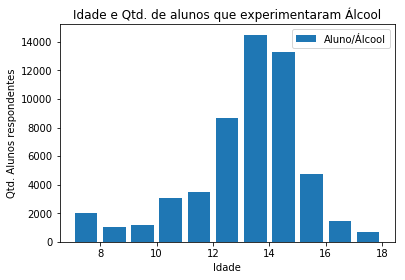

In [68]:
df[['Aluno/Álcool']].plot(kind='hist',bins=[7,8,9,10,11,12,13,14,15,16,17,18],rwidth=0.8)

plt.title('Idade e Qtd. de alunos que experimentaram Álcool')
plt.ylabel('Qtd. Alunos respondentes')
plt.xlabel('Idade')
plt.show()

Observamos que apesar da existência de leis proibindo a oferta de bebidas alcoólicas entre menores de 18 anos de idade, dados epidemiológicos mostram que o consumo de álcool nessa faixa etária é crescente. Inclusive, o álcool é a substância psicoativa mais consumida por adolescentes, o que é preocupante porque pode comprometer o desenvolvimento do sistema nervoso central, e tem impacto negativo no desempenho escolar. Apesar de ser ilegal, vemos que estudantes brasileiros com idades entre 7 e 17 anos (praticamente todos os perfis abordados na pesquisa) já experimentaram bebidas alcoólicas tendo seu pico, aos 13 anos de idade.

A organização não governamental Centro de Informações sobre Saúde e Álcool (CISA) sugere que embora os casos em que a idade da experimentação de álcool tem desdobramentos negativos a longo prazo estão relacionados a um conjunto de fatores de risco individuais e sociais: traços de personalidade, traumas, relações disfuncionais no ambiente familiar, vulnerabilidade social, entre outros.

Sugere - seque as escolas invistam em programas estruturados e baseados em evidências científicas. Destaca-se ainda a importância de capacitar o corpo docente para lidar com questões relacionadas ao uso de álcool e outras substâncias psicoativas entre os alunos trabalhando em conjunto com seus familiares.